<a href="https://colab.research.google.com/github/shirishbahirat/artificial-intelligence/blob/master/Convolutional_Neural_Networks_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls zero_to_deep_learning_video

course	environment-gpu.yml  floyd_requirements.txt  README.md	tests
data	environment.yml      LICENSE		     solutions


In [4]:
from keras.datasets import mnist

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

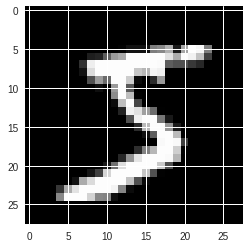

In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')

In [0]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [13]:
X_train.shape

(60000, 784)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [15]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [18]:
y_train[0]

5

In [19]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_train_cat.shape

(60000, 10)

In [21]:
y_test_cat.shape

(10000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [23]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 156us/step - loss: 0.3340 - acc: 0.8958 - val_loss: 0.2717 - val_acc: 0.9177
Epoch 2/10
42000/42000 [==============================] - 7s 157us/step - loss: 0.1161 - acc: 0.9644 - val_loss: 0.1220 - val_acc: 0.9634
Epoch 3/10
42000/42000 [==============================] - 7s 156us/step - loss: 0.0735 - acc: 0.9776 - val_loss: 0.0954 - val_acc: 0.9723
Epoch 4/10
42000/42000 [==============================] - 6s 153us/step - loss: 0.0532 - acc: 0.9837 - val_loss: 0.1308 - val_acc: 0.9643
Epoch 5/10
42000/42000 [==============================] - 6s 152us/step - loss: 0.0382 - acc: 0.9880 - val_loss: 0.1072 - val_acc: 0.9745
Epoch 6/10
42000/42000 [==============================] - 6s 151us/step - loss: 0.0297 - acc: 0.9908 - val_loss: 0.1345 - val_acc: 0.9698
Epoch 7/10
42000/42000 [==============================] - 6s 149us/step - loss: 0.0248 - acc: 0.9924 - val_loss: 0.1135 - 

Text(0.5, 0, 'Epochs')

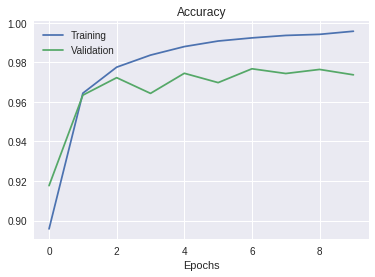

In [24]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [25]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 75us/step


0.977

In [0]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [27]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[ 81,  65,  16],
        [178, 154,  80],
        [200,  31, 153],
        [226, 196, 126]],

       [[ 73,  11,  18],
        [241,  34,  31],
        [ 27,  25,  97],
        [232,  47,  37]],

       [[ 52,   5, 128],
        [191,  45,  69],
        [108, 198, 188],
        [168,  36, 229]],

       [[ 98, 233,  35],
        [153, 105,  74],
        [140, 187, 201],
        [173,  93, 165]]], dtype=uint8)

Text(0.5, 1.0, 'Blue channel')

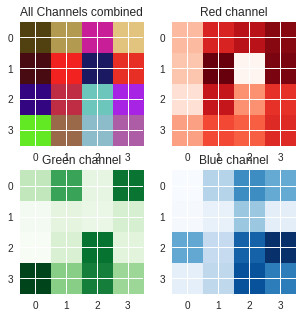

In [28]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel")

In [29]:
2 * A

array([[[[12, 14,  0, 18,  0],
         [18,  6,  2, 18,  8],
         [ 6, 12,  0, 12, 10],
         [ 2, 10, 16,  0, 16]],

        [[ 8,  2, 18,  0, 14],
         [ 2, 18, 18,  0,  0],
         [ 0, 18, 10, 12, 14],
         [10, 12,  0,  2,  4]],

        [[16,  8, 16,  0,  6],
         [16, 12,  2, 16, 12],
         [10,  8, 10, 10, 14],
         [18,  8, 18,  0,  0]]],


       [[[16,  8,  4, 10,  6],
         [ 8,  0,  0, 18, 12],
         [16, 16,  8,  4, 16],
         [16, 10, 14, 12,  6]],

        [[18,  6,  4,  0,  4],
         [18,  8, 14,  0, 16],
         [12, 12, 10, 10,  4],
         [ 6,  6,  4, 16,  4]],

        [[ 4,  2,  6,  8, 10],
         [ 2,  0, 16,  6,  2],
         [ 4,  6, 16, 16, 16],
         [10, 18, 18, 16, 18]]]])

In [30]:
A + A

array([[[[12, 14,  0, 18,  0],
         [18,  6,  2, 18,  8],
         [ 6, 12,  0, 12, 10],
         [ 2, 10, 16,  0, 16]],

        [[ 8,  2, 18,  0, 14],
         [ 2, 18, 18,  0,  0],
         [ 0, 18, 10, 12, 14],
         [10, 12,  0,  2,  4]],

        [[16,  8, 16,  0,  6],
         [16, 12,  2, 16, 12],
         [10,  8, 10, 10, 14],
         [18,  8, 18,  0,  0]]],


       [[[16,  8,  4, 10,  6],
         [ 8,  0,  0, 18, 12],
         [16, 16,  8,  4, 16],
         [16, 10, 14, 12,  6]],

        [[18,  6,  4,  0,  4],
         [18,  8, 14,  0, 16],
         [12, 12, 10, 10,  4],
         [ 6,  6,  4, 16,  4]],

        [[ 4,  2,  6,  8, 10],
         [ 2,  0, 16,  6,  2],
         [ 4,  6, 16, 16, 16],
         [10, 18, 18, 16, 18]]]])

In [31]:
A.shape

(2, 3, 4, 5)

In [32]:
B.shape

(2, 3)

In [33]:
np.tensordot(A, B, axes=([0, 1], [0, 1]))

array([[183,  83, 113,  47,  88],
       [155, 126, 132,  87, 126],
       [110, 179, 111, 128, 135],
       [124, 116,  97, 103,  68]])

In [34]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

In [0]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [0]:
b = np.array([-1, 1], dtype='float32')

In [0]:
c = np.convolve(a, b)

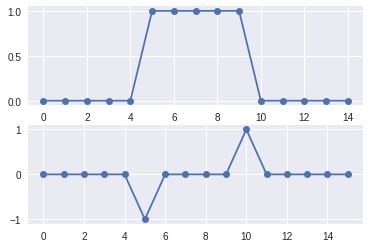

In [38]:
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')

In [0]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [0]:
img = misc.ascent()

In [41]:
img.shape

(512, 512)

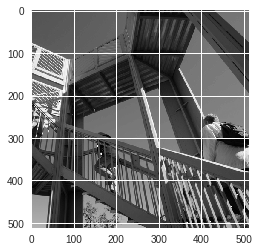

In [42]:
plt.imshow(img, cmap='gray')

In [0]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

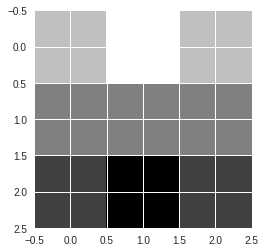

In [44]:
plt.imshow(h_kernel, cmap='gray')

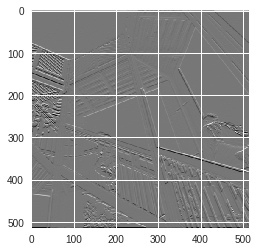

In [45]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray')

In [0]:
from keras.layers import Conv2D

In [47]:
img.shape

(512, 512)

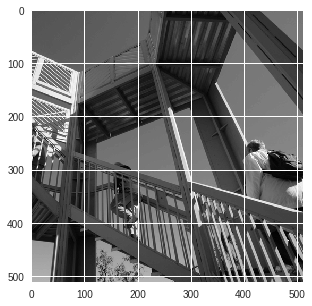

In [48]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')

In [0]:
img_tensor = img.reshape((1, 512, 512, 1))

In [0]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [0]:
img_pred_tensor = model.predict(img_tensor)

In [52]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [0]:
img_pred = img_pred_tensor[0, :, :, 0]

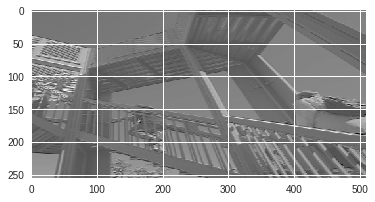

In [54]:
plt.imshow(img_pred, cmap='gray')

In [0]:
weights = model.get_weights()

In [56]:
weights[0].shape

(3, 3, 1, 1)

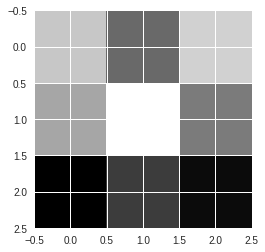

In [57]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [0]:
weights[0] = np.ones(weights[0].shape)

In [0]:
model.set_weights(weights)

In [0]:
img_pred_tensor = model.predict(img_tensor)

In [0]:
img_pred = img_pred_tensor[0, :, :, 0]

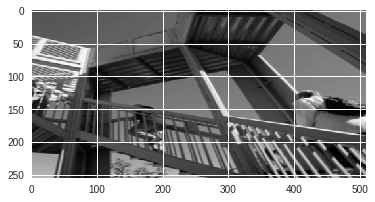

In [62]:
plt.imshow(img_pred, cmap='gray')

In [63]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

In [0]:
from keras.layers import MaxPool2D, AvgPool2D

In [0]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [0]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

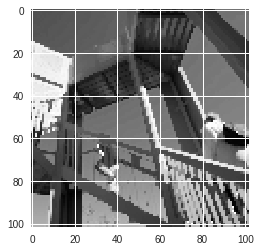

In [67]:
plt.imshow(img_pred, cmap='gray')

In [0]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

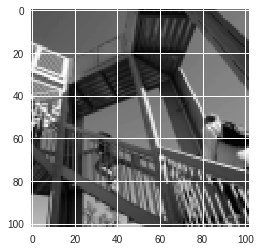

In [69]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray')

In [0]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [71]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
from keras.layers import Flatten, Activation

In [0]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 28s 671us/step - loss: 0.2586 - acc: 0.9233 - val_loss: 0.1160 - val_acc: 0.9629
Epoch 2/2
42000/42000 [==============================] - 28s 670us/step - loss: 0.0763 - acc: 0.9773 - val_loss: 0.0806 - val_acc: 0.9767


In [76]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 3s 255us/step


[0.06590501001998782, 0.9801]